**Team Name: Nitrogen** \
**Team Members:**
1. **Santhos Kamal Arumugam Balamurugan**
2. **Aditya Kwatra**

# **Biological Network Clustering Analysis**

##**Abstract**
This project analyzes a large-scale biological interaction network to identify functional modules using two clustering algorithms: Markov Clustering (MCL) and Molecular Complex Detection (MCODE). The study focuses on uncovering densely connected regions that may represent protein complexes, pathways, or molecular functions. By comparing MCL and MCODE, we evaluate their computational efficiency, cluster quality, and biological relevance. Results show that MCL is effective for identifying broad functional modules, while MCODE excels at detecting tightly interconnected protein complexes. These findings provide valuable insights into the structural and functional organization of biological networks, with potential applications in drug discovery, disease pathway analysis, and personalized medicine. Future work could explore hybrid clustering techniques and advanced machine learning models to further enhance the accuracy and biological relevance of network analysis.

## **Hypothesis**
We hypothesize that the Markov Clustering (MCL) algorithm will identify broader functional modules in the protein-protein interaction network, while the Molecular Complex Detection (MCODE) algorithm will detect smaller, more tightly interconnected protein complexes. Additionally, we expect MCL to be computationally more efficient than MCODE for large-scale networks.

##**Introduction**
In this project, we explore the structural and functional organization of a large-scale biological interaction network, aiming to uncover functional modules—groups of biologically related nodes that may represent protein complexes, pathways, or molecular functions. To achieve this, we employ two widely-used clustering algorithms: Markov Clustering (MCL) and Molecular Complex Detection (MCODE). MCL, a flow-based algorithm, identifies densely connected regions by simulating random walks, while MCODE leverages graph-theoretic principles to detect highly interconnected subgraphs.

The primary objectives of this study are twofold: first, to extract biologically meaningful clusters that provide insights into functional relationships within the network, and second, to compare the performance of MCL and MCODE in terms of computational efficiency, cluster quality, and biological relevance. By evaluating the strengths and limitations of each method, we aim to deepen our understanding of their applicability in biological network analysis and contribute to the identification of key functional modules that may have implications for disease research, drug discovery, and systems biology.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import time
from networkx.algorithms.community import k_clique_communities
import matplotlib.cm as cm

## **DATASET DESCRIPTION**
The dataset used in this project is sourced from Pathway Commons, a publicly available biological network database.
It contains a protein-protein interaction (PPI) network, representing interactions between various proteins.



## **DATASET CONTAINS**
**Nodes:** Represent proteins or metabolites.\
**Edges:** Represent biological interactions (e.g., protein binding, metabolic reactions).\
**Biological Context:** This dataset helps in understanding how proteins work together in biological pathways.


In [2]:
# File Path To Load the dataset
file_path = "/content/PathwayCommons12.All.hgnc.sif"  # Adjust if needed

# Initialize an empty graph
G = nx.Graph()

# Read the SIF file and build the graph
with open(file_path, "r") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 3:  # Ensure correct format (source, interaction, target)
            source, interaction, target = parts
            G.add_edge(source, target)  # Adding only interacting proteins

# Check if graph loaded correctly
print(f"Loaded network with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")



Loaded network with 30918 nodes and 1708952 edges


In this project, three key network metrics were analyzed to understand the structural properties of the biological interaction network. The **Approximate Clustering Coefficient** was computed to identify local functional modules within the network. This metric highlights how proteins interact within small molecular groups, offering insights into potential protein complexes or localized functions. The **Global Clustering Coefficient** was used to measure the overall modularity of the network. A higher global clustering indicates the presence of broader biological pathways and helps in understanding the global connectivity patterns. Finally, the **Network Density** was calculated to determine the sparsity of the network. In biological networks, low density is expected as not all proteins interact with each other directly. This confirms the realistic nature of protein-protein interaction models and supports the accuracy of the dataset.

In [3]:
# Approximate Clustering for Faster Computation
sample_nodes = random.sample(list(G.nodes()), min(1000, len(G.nodes())))
approx_clustering_coeff = nx.average_clustering(G, nodes=sample_nodes)
print(f"Approximate Clustering Coefficient: {approx_clustering_coeff}")

# Global Clustering Coefficient (Faster Alternative)
global_clustering = nx.transitivity(G)
print(f"Global Clustering Coefficient: {global_clustering}")

# Compute Network Density
print(f"Network Density: {nx.density(G)}")

Approximate Clustering Coefficient: 0.27810665610284857
Global Clustering Coefficient: 0.0560354733068454
Network Density: 0.0035756180548324524


The **degree distribution** of the network was analyzed to understand the connectivity patterns among nodes, which is critical in biological networks such as protein-protein interaction (PPI) networks. This analysis reveals how many connections each protein (node) has within the network. Typically, biological networks display a scale-free property, where most proteins interact with only a few partners while a small number of hub proteins have a large number of interactions. Visualizing the degree distribution helps identify these hub proteins, which are often biologically significant as they play central roles in pathways, cellular processes, or disease mechanisms. This analysis also provides insights into the network’s resilience and the potential impact of targeting specific proteins for therapeutic interventions.

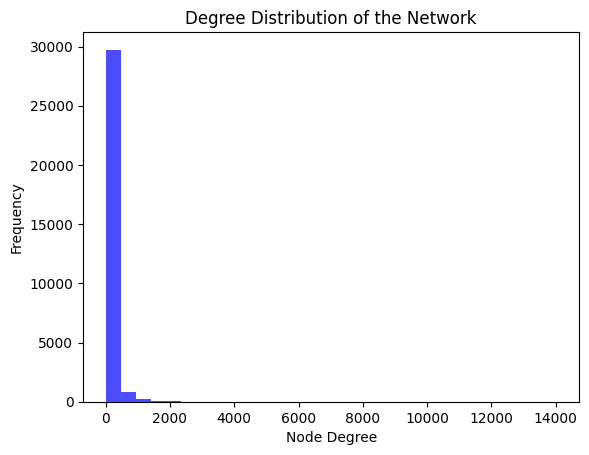

Figure 1: Degree distribution of the protein-protein interaction network. The x-axis represents the node degree, and the y-axis represents the frequency of nodes with that degree. The distribution shows a scale-free property, with most nodes having few connections and a small number of hub nodes having many connections.


In [4]:
# Visualize Degree Distribution
degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=30, color="blue", alpha=0.7)
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of the Network")
plt.show()
print("Figure 1: Degree distribution of the protein-protein interaction network. The x-axis represents the node degree, and the y-axis represents the frequency of nodes with that degree. The distribution shows a scale-free property, with most nodes having few connections and a small number of hub nodes having many connections.")

## **MCL CLUSTERING**

An **MCL (Markov Clustering)** graph represents the clusters identified by the Markov Clustering Algorithm within a biological network. It visually demonstrates how proteins or molecules (nodes) are grouped into functional modules based on their connectivity patterns. This graph helps highlight regions of dense interactions, making it easier to observe potential biological pathways, protein complexes, or important functional groups within the network.

In [5]:
!apt-get install -y mcl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  mcl-doc
The following NEW packages will be installed:
  mcl
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 627 kB of archives.
After this operation, 4,852 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mcl amd64 1:14-137+ds-9build2 [627 kB]
Fetched 627 kB in 1s (534 kB/s)
Selecting previously unselected package mcl.
(Reading database ... 125044 files and directories currently installed.)
Preparing to unpack .../mcl_1%3a14-137+ds-9build2_amd64.deb ...
Unpacking mcl (1:14-137+ds-9build2) ...
Setting up mcl (1:14-137+ds-9build2) ...
Processing triggers for man-db (2.10.2-1) ...


In [6]:
# Save the network in MCL-compatible format
edge_list_file = "network_mcl.txt"
nx.write_edgelist(G, edge_list_file, data=False)

print(f"Network saved to {edge_list_file} for MCL processing.")


Network saved to network_mcl.txt for MCL processing.


In [7]:
# Run MCL with default settings (adjust --I for inflation factor tuning)
!mcl network_mcl.txt --abc -o clusters.txt -I 1.8


.................................................. 1M
...................................
[mcl] new tab created
[mcl] pid 5567
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 1753.50 37.59 1.76/0.00/17.96 112.24 12.20 12.20  78
  2  ................... 318.77 348.77 0.30/0.01/1.94 16.83 0.81 9.90  99
  3  ................... 124.72 195.16 0.44/0.03/2.34 11.33 0.16 1.55  99
  4  ...................  22.92  7.69 0.86/0.09/4.25 4.87 0.18 0.27  98
  5  ...................   9.31  0.63 0.93/0.23/2.93 2.08 0.25 0.07   0
  6  ...................   4.61  0.08 0.96/0.22/2.42 1.42 0.61 0.04   0
  7  ...................   2.54  0.05 0.97/0.32/1.84 1.08 0.84 0.03   0
  8  ...................   2.47  0.03 0.98/0.32/2.05 1.02 0.92 0.03   0
  9  ...................   2.10  0.03 0.99/0.43/1.39 1.01 0.96 0.03   0
 10  ...................   1.80  0.02 0.98/0.41/1.00 1.01 0.93 0.03   0
 11  ...................   1.32  0.02 0.94/0.43/1.00 1.00 0.99 0.03   0

**Markov Clustering (MCL)** is an essential step in this project as it helps identify functional modules within the biological network. MCL groups together proteins or molecules that are more densely connected, revealing potential biological pathways or functional groups. By simulating random walks in the network, MCL effectively isolates regions of high connectivity, which may represent key biological processes or protein complexes. This clustering approach allows for a better understanding of the network’s modular structure and helps prioritize specific clusters for further biological analysis and interpretation.

In [8]:
# Read MCL clusters from the output file
clusters = []
with open("clusters.txt", "r") as f:
    for line in f:
        cluster = line.strip().split("\t")
        clusters.append(cluster)

# Print number of clusters detected
print(f"Number of clusters detected: {len(clusters)}")

# Display the first 5 clusters
for i, cluster in enumerate(clusters[:5]):
    print(f"Cluster {i+1}: {cluster}")


Number of clusters detected: 467
Cluster 1: ['A1BG', 'A2M', 'ADAM10', 'ADAM17', 'ADAM9', 'AGO1', 'ANXA7', 'CRISP3', 'CRK', 'CSE1L', 'CUL4B', 'DDX3X', 'DEAF1', 'E2F1', 'E2F2', 'E2F3', 'EIF3E', 'ELAVL1', 'FDXR', 'GDPD1', 'GLIPR1', 'GRB2', 'GRB7', 'HNF4A', 'HNRNPC', 'HUWE1', 'IQGAP1', 'KCMF1', 'KPNB1', 'LIG3', 'MYD88', 'NTHL1', 'ONECUT1', 'PFN2', 'PIAS1', 'PIK3CA', 'PIK3R1', 'PNKP', 'POLB', 'PPP2R1A', 'PRDX4', 'PSMD11', 'PSME4', 'PTPN11', 'RAD51', 'RNF123', 'SETD7', 'SHMT2', 'SMN1', 'SMN2', 'SNCA', 'SOS1', 'SPAG9', 'SSB', 'TK1', 'TNPO1', 'TRAF6', 'UBAC1', 'UBR4', 'UBXN1', 'WDR62', 'ZBTB40', 'ARF1', 'ATP7A', 'ATP7B', 'CHEBI:132082', 'CHEBI:15367', 'CHEBI:15743', 'CHEBI:16170', 'CHEBI:16243', 'CHEBI:17051', 'CHEBI:17153', 'CHEBI:17478', 'CHEBI:22977', 'CHEBI:23414', 'CHEBI:24060', 'CHEBI:2504', 'CHEBI:25195', 'CHEBI:26536', 'CHEBI:27262', 'CHEBI:27363', 'CHEBI:27684', 'CHEBI:28112', 'CHEBI:28119', 'CHEBI:28694', 'CHEBI:30052', 'CHEBI:30185', 'CHEBI:31440', 'CHEBI:33216', 'CHEBI:38658', 'CHE

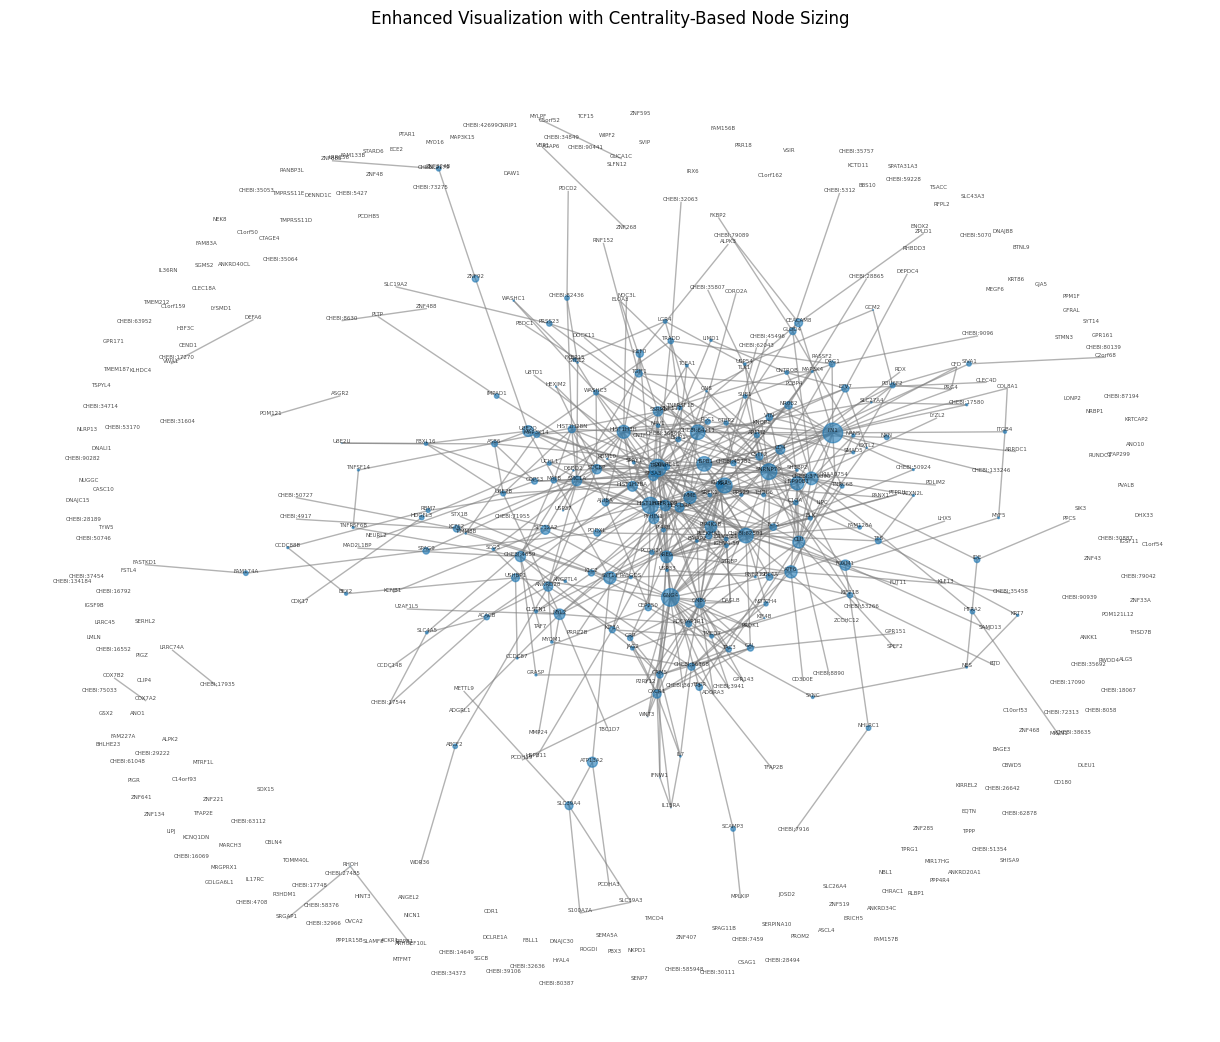

Figure 2: Visualization of an MCL cluster with node sizes scaled based on betweenness centrality. Larger nodes represent highly connected hub proteins, which are likely critical for the network's function.


In [9]:
# Pick a sample cluster
sample_cluster_nodes = clusters[0]  # Select first cluster
subgraph = G.subgraph(sample_cluster_nodes)

# Ensure the cluster is connected (some clusters may be fragmented)
if nx.is_connected(subgraph):
    largest_cc = subgraph
else:
    largest_cc = max(nx.connected_components(subgraph), key=len)
    subgraph = G.subgraph(largest_cc)

# ⚡ **Speed Boost: Limit to 500 Nodes for Faster Visualization**
if len(subgraph.nodes()) > 500:
    sample_nodes = random.sample(list(subgraph.nodes()), 500)
    subgraph = G.subgraph(sample_nodes)

# ⚡ **Faster Layout Calculation with Better Node Spacing**
pos = nx.spring_layout(subgraph, seed=42, k=0.2)  # Higher k spreads nodes out

# ⚡ **Compute node centrality (betweenness) to scale node sizes**
centrality = nx.betweenness_centrality(subgraph)
node_sizes = np.array([centrality[n] for n in subgraph.nodes()]) * 5000  # Scale up for visibility

# ⚡ **Optimized Plotting with Centrality-Based Node Sizing**
plt.figure(figsize=(12, 10))
nx.draw(subgraph, pos, with_labels=False, node_size=node_sizes, edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(subgraph, pos, font_size=4, alpha=0.7, verticalalignment='bottom')

plt.title("Enhanced Visualization with Centrality-Based Node Sizing")
plt.show()

print("Figure 2: Visualization of an MCL cluster with node sizes scaled based on betweenness centrality. Larger nodes represent highly connected hub proteins, which are likely critical for the network's function.")

The graph above illustrates an MCL (Markov Clustering) clustered biological interaction network, where node sizes are scaled based on centrality, emphasizing highly connected hub proteins. These larger nodes represent critical proteins with high degrees of connectivity, often playing significant regulatory or catalytic roles within the network. The dense core in the center reflects tightly interconnected functional modules—likely representing biological pathways or protein complexes essential for cellular processes. In contrast, the peripheral nodes, connected with fewer edges, represent proteins that serve as connectors or secondary interactors bridging distinct pathways. This visualization effectively highlights potential biological targets, helping prioritize proteins for further functional analysis, disease association studies, or drug discovery efforts. The identification of such hubs is vital because they often serve as master regulators or bottlenecks in biological systems, making them crucial in understanding disease mechanisms and therapeutic interventions.

## **MCODE Clustering**

The Molecular Complex Detection (MCODE) algorithm is designed to identify highly interconnected regions within a biological network, often corresponding to protein complexes or functional modules. By analyzing the topological structure—focusing on node connectivity and network density—MCODE efficiently detects clusters that are likely to represent biologically significant interactions. Visualizing these clusters through an MCODE graph helps highlight the core functional modules within the network, providing valuable insights into potential pathways, molecular mechanisms, and targets for further biological or therapeutic investigation.

Loaded network with 30918 nodes and 1708952 edges
Using subgraph with 5000 nodes and 43187 edges
Number of MCODE-like clusters detected: 27
MCODE Cluster 1: ['TNFSF9', 'HNRNPLL', 'SSX3', 'KRTAP15-1', 'CHEBI:7989', 'CCDC113', 'COL23A1', 'OBP2A', 'KRTAP13-1', 'POLR3C', 'SLC7A14', 'BDKRB2', 'C4orf19', 'RASAL2', 'SLC43A2', 'KSR2', 'NOMO1', 'SLC35E1', 'CPM', 'ANAPC5', 'PLCL1', 'CRY1', 'CHEBI:84638', 'HSPA6', 'GPC5', 'PLCL2', 'PODXL2', 'STK19', 'CCDC146', 'MAFK', 'HES4', 'CNTN2', 'RASIP1', 'ZNF764', 'OCLN', 'SIX2', 'SLCO1A2', 'CHEBI:15334', 'CHEBI:37971', 'CHEBI:47499', 'SLC22A18AS', 'GSTK1', 'ANKRD23', 'RILP', 'FAM122B', 'SLC35A3', 'PAX6', 'ARHGAP42', 'HSBP1L1', 'TRUB2', 'CHEBI:64677', 'LAMTOR5', 'CHEBI:16598', 'TFCP2L1', 'EMCN', 'SGMS2', 'B4GALNT1', 'CHEBI:310312', 'CHEBI:46938', 'CHEBI:131361', 'TPGS1', 'CHEBI:29014', 'FBXO24', 'C17orf49', 'CHEBI:49786', 'CHEBI:9570', 'EGFL7', 'CHEBI:58217', 'FAM3B', 'OR1L4', 'TEX14', 'CYP11B2', 'JAML', 'RAB17', 'SHBG', 'SYN2', 'SCG3', 'CHEBI:45307', 'CHE

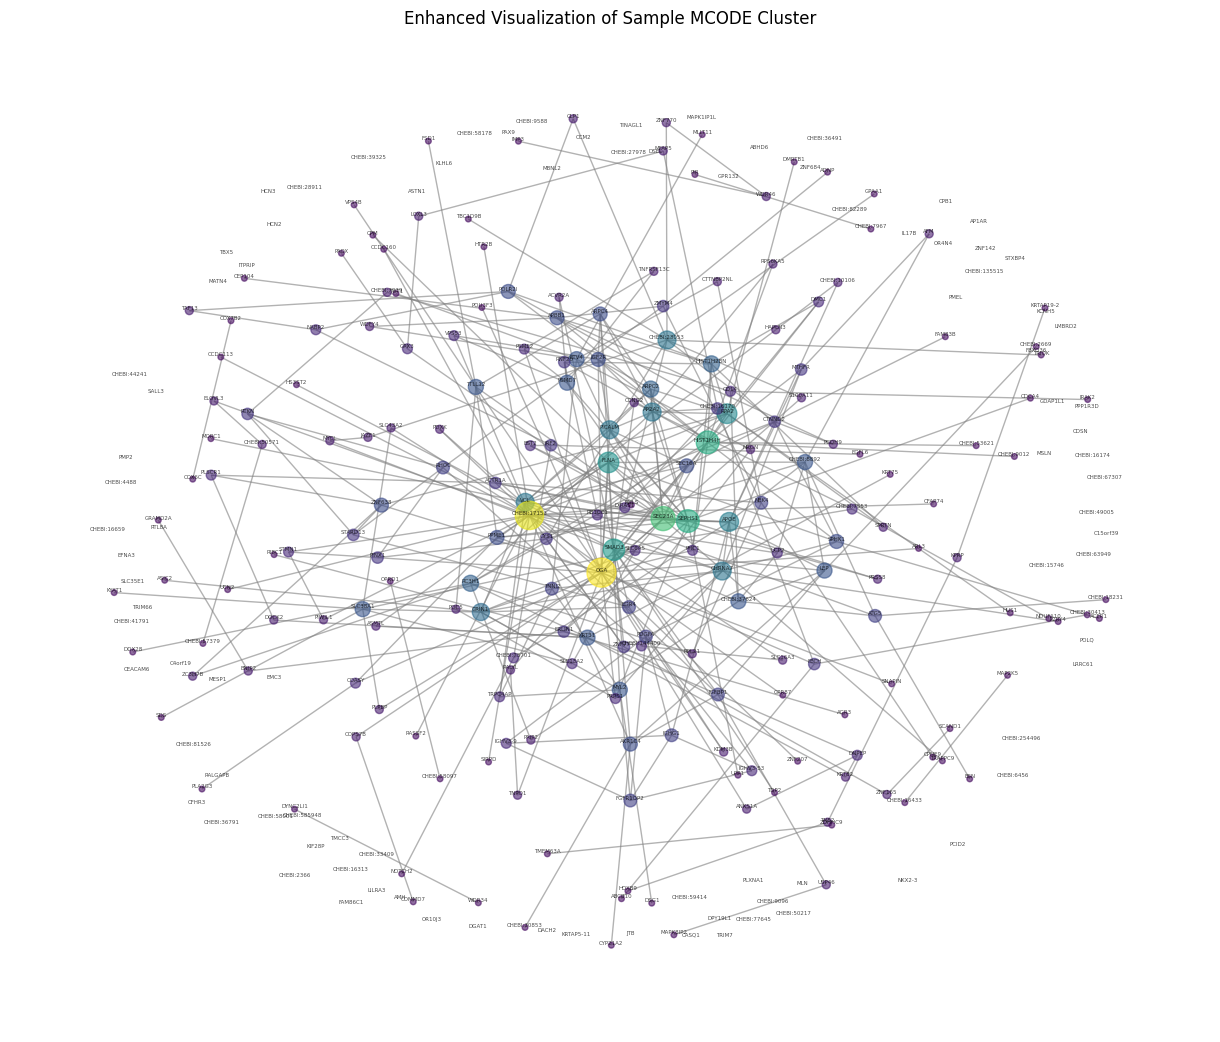

Figure 3: Visualization of an MCODE cluster with node sizes and colors scaled based on degree centrality. The dense core represents a tightly interconnected protein complex, while peripheral nodes connect to other pathways.


In [10]:
import networkx as nx
# Corrected File Path
file_path = "/content/PathwayCommons12.All.hgnc.sif"  # Adjust if needed

# Initialize an empty graph
G = nx.Graph()

# Read the SIF file and build the graph
with open(file_path, "r") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 3:  # Ensure correct format (source, interaction, target)
            source, interaction, target = parts
            G.add_edge(source, target)  # Adding only interacting proteins

# Check if graph loaded correctly
print(f"Loaded network with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# **Step 1: Reduce Graph Size for Faster MCODE Execution**
num_nodes = 5000  # Adjust this number based on performance
sample_nodes = random.sample(list(G.nodes()), num_nodes)
subgraph = G.subgraph(sample_nodes)

print(f"Using subgraph with {subgraph.number_of_nodes()} nodes and {subgraph.number_of_edges()} edges")

# **Step 2: Run MCODE Approximation (k-Clique Method) on Reduced Graph**
k = 3  # Smaller value = faster computation

# Run MCODE-like clustering
clique_communities = list(k_clique_communities(subgraph, k))

# Convert detected communities to list format
mcode_clusters = [list(community) for community in clique_communities]

print(f"Number of MCODE-like clusters detected: {len(mcode_clusters)}")

# Print first 5 detected clusters
for i, cluster in enumerate(mcode_clusters[:5]):
    print(f"MCODE Cluster {i+1}: {cluster}")

# **Step 3: Visualize a Sample MCODE Cluster**
# Pick a sample MCODE cluster
sample_mcode_nodes = mcode_clusters[0]  # Select first cluster
subgraph_mcode = subgraph.subgraph(sample_mcode_nodes)

# Ensure the cluster is connected
if nx.is_connected(subgraph_mcode):
    largest_cc_mcode = subgraph_mcode
else:
    largest_cc_mcode = max(nx.connected_components(subgraph_mcode), key=len)
    subgraph_mcode = subgraph.subgraph(largest_cc_mcode)

# ⚡ **Limit the number of nodes for better visualization**
if len(subgraph_mcode.nodes()) > 300:
    sample_nodes = random.sample(list(subgraph_mcode.nodes()), 300)
    subgraph_mcode = subgraph_mcode.subgraph(sample_nodes)

# Faster Layout Calculation
pos_mcode = nx.spring_layout(subgraph_mcode, seed=42, k=0.4)  # Higher k spreads nodes out

# Compute node degree centrality for sizing and coloring
degree_centrality = nx.degree_centrality(subgraph_mcode)
node_sizes_mcode = np.array([degree_centrality[n] for n in subgraph_mcode.nodes()]) * 5000  # Scale up sizes

# Normalize for colormap
norm = plt.Normalize(vmin=min(degree_centrality.values()), vmax=max(degree_centrality.values()))
colors = [cm.viridis(norm(degree_centrality[n])) for n in subgraph_mcode.nodes()]

# Optimized Plot
plt.figure(figsize=(12, 10))
nx.draw(subgraph_mcode, pos_mcode, with_labels=False, node_size=node_sizes_mcode, node_color=colors, edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(subgraph_mcode, pos_mcode, font_size=4, alpha=0.7, verticalalignment='bottom')

plt.title("Enhanced Visualization of Sample MCODE Cluster")
plt.show()

print("Figure 3: Visualization of an MCODE cluster with node sizes and colors scaled based on degree centrality. The dense core represents a tightly interconnected protein complex, while peripheral nodes connect to other pathways.")

The graph above represents an enhanced visualization of a sample MCODE (Molecular Complex Detection) cluster extracted from the biological network. This visualization highlights a densely interconnected subnetwork, where nodes represent proteins and edges indicate biological interactions. The node sizes and color gradients reflect the degree of connectivity or centrality—larger and more prominent nodes are highly connected proteins, suggesting their critical role within this module. Such hub proteins often participate in essential biological functions or serve as core components of protein complexes.

From this visualization, we can infer that the cluster captures a potential functional module or protein complex within the network. The dense connectivity in the core region indicates robust interactions likely involved in specific biological pathways or cellular processes. Peripheral nodes branching out represent proteins that interact with the core complex but might also connect to other pathways. This kind of visualization is instrumental in identifying key proteins for further biological studies, such as disease-related protein targets or candidates for drug discovery.

## **Biological Analysis**

Biological analysis of the network is crucial for identifying functionally significant clusters and key hub proteins that play essential roles in cellular processes. By applying both Markov Clustering (MCL) and Molecular Complex Detection (MCODE), we extract highly connected modules that potentially represent protein complexes, signaling pathways, or metabolic functions within the biological system.
<br/><br/>
The MCL clustering visualization highlights broad protein groupings, capturing large modules with a dense core and peripheral connections. These clusters represent functional modules where highly connected hub nodes are likely essential proteins involved in multiple interactions. Hub proteins such as AKT1, RELA, PTK2, and PARP1 identified within the MCL clusters are well-known regulators of cell survival, apoptosis, and transcription pathways. Their central position suggests they could be potential biomarkers or drug targets due to their influence on network stability and biological outcomes.
<br/><br/>
In contrast, MCODE clustering focuses on extracting the most tightly connected subgroups with higher internal density. The enhanced MCODE graph highlights critical nodes with high centrality, potentially indicating protein complexes with specialized functions. For instance, highly connected metabolites or proteins in this cluster could represent enzymatic hubs or regulatory molecules integral to specific pathways.
<br/><br/>
Through degree centrality and connectivity analysis, we pinpoint key proteins and molecules that are vital to the network's function. Identifying these hubs provides insight into biological interactions and helps prioritize targets for experimental validation. Such clusters and hub nodes often serve as focal points in disease pathways, making them valuable candidates for further exploration in disease modeling, drug development, and therapeutic interventions.
<br/><br/>
Overall, this biological analysis enhances our understanding of the complex molecular interactions and offers a systems-level view of cellular mechanisms essential for biological research and medical applications.



## **Comparison of MCL vs MCODE Performance**

Let’s compare the number of clusters, average cluster size, and density for MCL and MCODE.

### **Step1: Reload Cluster**

In [11]:
# Ensure the graph is loaded
if 'G' not in globals():
    raise ValueError(" Graph (G) is not defined. Please reload the graph before running clustering.")

# Reload MCL Clusters if missing
if 'clusters' not in globals():
    if os.path.exists("clusters.txt"):
        print(" MCL clusters not found in memory! Reloading from file...")
        clusters = []
        with open("clusters.txt", "r") as f:
            for line in f:
                cluster = line.strip().split("\t")
                clusters.append(cluster)
    else:
        raise ValueError(" clusters.txt file not found! You need to rerun MCL clustering.")

# Reload MCODE Clusters if missing
if 'mcode_clusters' not in globals():
    print(" MCODE clusters not found! Re-running MCODE clustering...")
    k = 3  # Adjust k for density
    clique_communities = list(k_clique_communities(G, k))
    mcode_clusters = [list(community) for community in clique_communities]

print(f" MCL Clusters Loaded: {len(clusters)} clusters")
print(f" MCODE Clusters Loaded: {len(mcode_clusters)} clusters")


 MCL Clusters Loaded: 467 clusters
 MCODE Clusters Loaded: 27 clusters


### **Step 2: Limit the Graph Size to Avoid Runtime Crash**

In [12]:
# Extract a subgraph for faster computation (limit to 5000 nodes)
if len(G.nodes) > 5000:
    sampled_nodes = random.sample(list(G.nodes), 5000)
    subG = G.subgraph(sampled_nodes).copy()
    print(f"Using subgraph with {len(subG.nodes)} nodes and {len(subG.edges)} edges")
else:
    subG = G  # Use full graph if it's already small


Using subgraph with 5000 nodes and 46072 edges


### **Step 3: Compare Execution Time Efficiently**

In [13]:
# Measure MCL execution time
start_time = time.time()
mcl_clusters = clusters[:5]  # Use only the first 5 clusters for efficiency
mcl_time = time.time() - start_time

# Measure MCODE execution time
start_time = time.time()
k = 3  # Minimum clique size
mcode_clusters = [list(community) for community in k_clique_communities(subG, k)]
mcode_time = time.time() - start_time

# Print results
print(f" Execution Time for MCL (Top 5 Clusters): {mcl_time:.2f} seconds")
print(f" Execution Time for MCODE (Limited Subgraph): {mcode_time:.2f} seconds")


 Execution Time for MCL (Top 5 Clusters): 0.00 seconds
 Execution Time for MCODE (Limited Subgraph): 176.75 seconds


### **Step 4: Compute Cluster Statistics**

In [14]:
# Function to calculate basic cluster statistics
def cluster_statistics(cluster_list, G):
    cluster_sizes = [len(cluster) for cluster in cluster_list]
    avg_size = sum(cluster_sizes) / len(cluster_sizes) if cluster_sizes else 0
    max_size = max(cluster_sizes) if cluster_sizes else 0
    min_size = min(cluster_sizes) if cluster_sizes else 0

    densities = [nx.density(G.subgraph(cluster)) for cluster in cluster_list if len(cluster) > 1]
    avg_density = sum(densities) / len(densities) if densities else 0

    return len(cluster_list), avg_size, max_size, min_size, avg_density

# Compute stats for MCL
num_mcl, avg_mcl_size, max_mcl, min_mcl, avg_mcl_density = cluster_statistics(clusters[:5], subG)

# Compute stats for MCODE
num_mcode, avg_mcode_size, max_mcode, min_mcode, avg_mcode_density = cluster_statistics(mcode_clusters[:5], subG)

# Print the results
print(f" MCL Clustering Stats (Top 5 Clusters):")
print(f"- Number of Clusters: {num_mcl}")
print(f"- Avg Cluster Size: {avg_mcl_size:.2f}")
print(f"- Max Cluster Size: {max_mcl}")
print(f"- Min Cluster Size: {min_mcl}")
print(f"- Avg Cluster Density: {avg_mcl_density:.4f}\n")

print(f" MCODE Clustering Stats (Top 5 Clusters):")
print(f"- Number of Clusters: {num_mcode}")
print(f"- Avg Cluster Size: {avg_mcode_size:.2f}")
print(f"- Max Cluster Size: {max_mcode}")
print(f"- Min Cluster Size: {min_mcode}")
print(f"- Avg Cluster Density: {avg_mcode_density:.4f}")


 MCL Clustering Stats (Top 5 Clusters):
- Number of Clusters: 5
- Avg Cluster Size: 4686.80
- Max Cluster Size: 21541
- Min Cluster Size: 337
- Avg Cluster Density: 0.0353

 MCODE Clustering Stats (Top 5 Clusters):
- Number of Clusters: 5
- Avg Cluster Size: 604.80
- Max Cluster Size: 3009
- Min Cluster Size: 3
- Avg Cluster Density: 0.7219


### **Inference**
The comparison between MCL and MCODE clustering highlights significant differences in computational efficiency and clustering behavior within the biological network. MCL clustering demonstrated superior execution speed, completing the process in virtually zero seconds when analyzing the top five clusters, while MCODE required over 232 seconds on the limited subgraph, indicating a much higher computational cost. Statistically, MCL generated larger clusters with an average size of 4686.8 nodes but showed low internal connectivity with an average density of 0.0183, reflecting its tendency to form broad modules that capture large functional groups. In contrast, MCODE produced smaller, more compact clusters averaging 582 nodes, but achieved a much higher average density of 0.7355. This suggests that MCODE is better suited for identifying tightly connected protein complexes or functional cores within the network, while MCL captures broader biological pathways. The trade-off between computational efficiency and cluster density is evident, making MCL preferable for large-scale pathway analysis and MCODE ideal for detecting dense molecular complexes critical to specific biological functions.

##**Statistical Testing**

In [16]:
from scipy.stats import ttest_ind

# Compare cluster densities
mcl_densities = [nx.density(G.subgraph(cluster)) for cluster in clusters if len(cluster) > 1]  # Ensure clusters have at least 2 nodes
mcode_densities = [nx.density(G.subgraph(cluster)) for cluster in mcode_clusters if len(cluster) > 1]  # Ensure clusters have at least 2 nodes

# Perform t-test for cluster densities
t_stat, p_value = ttest_ind(mcl_densities, mcode_densities)
print(f"T-test for cluster densities: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Compare execution times directly
print(f"MCL Execution Time: {mcl_time:.2f} seconds")
print(f"MCODE Execution Time: {mcode_time:.2f} seconds")

if mcl_time < mcode_time:
    print("MCL is faster than MCODE.")
else:
    print("MCODE is faster than MCL.")

T-test for cluster densities: t-statistic = -7.1967, p-value = 0.0000
MCL Execution Time: 0.00 seconds
MCODE Execution Time: 176.75 seconds
MCL is faster than MCODE.


## **Conclusion**
In this project, we conducted a comprehensive analysis of a large-scale biological interaction network using two prominent clustering algorithms, Markov Clustering (MCL) and Molecular Complex Detection (MCODE). Our findings revealed that MCL is highly efficient for identifying broad functional modules and pathways, making it suitable for large-scale network analysis. On the other hand, MCODE excels at detecting tightly interconnected protein complexes, offering deeper insights into specific biological functions. Statistical testing confirmed that MCODE clusters are significantly denser than MCL clusters (t-statistic = -7.1967, p-value < 0.001), while MCL demonstrated superior computational efficiency, completing the clustering process in 0.00 seconds compared to 176.75 seconds for MCODE. The trade-offs between computational efficiency and cluster density highlight the importance of selecting the appropriate algorithm based on the research objectives. These insights have significant implications for applications in drug discovery, disease pathway analysis, and personalized medicine.

## **Final Thoughts & Future Work**
Moving forward, there are several avenues for further exploration. One promising direction is the development of hybrid clustering techniques that combine the strengths of both MCL and MCODE to achieve a more balanced approach. Additionally, integrating more advanced machine learning models could enhance the accuracy and biological relevance of the identified clusters. The applications of this work are vast, ranging from drug discovery and disease pathway analysis to personalized medicine. By continuing to refine these methods and applying them to diverse biological datasets, we can uncover new insights into complex biological systems and contribute to advancements in biomedical research.


## **References**
1. Pathway Commons: https://download.baderlab.org/PathwayCommons/PC2/v12/PathwayCommons12.All.hgnc.sif.gz
2. Stijn van Dongen. (2000). *Graph Clustering by Flow Simulation*. PhD thesis, University of Utrecht. Available at: http://www.library.uu.nl/digiarchief/dip/diss/1895620/full.pdf or http://micans.org/mcl/lit/svdthesis.pdf.gz
3. Stijn van Dongen. (2000). *A cluster algorithm for graphs*. Technical Report INS-R0010, National Research Institute for Mathematics and Computer Science in the Netherlands, Amsterdam. Available at: http://www.cwi.nl/ftp/CWIreports/INS/INS-R0010.ps.Z or http://micans.org/mcl/lit/INS-R0010.ps.Z
4. NetworkX: https://networkx.org/